## 사주 조회 데이터 분석
1. 사주 접속 로그데이터를 읽어 들인다.
2. 접속 시간대 데이터를 확인한다.

In [1]:
# -*- coding: utf-8 -*-

In [2]:
import numpy as np
import pandas as pd

In [8]:
# 사주 접속로그 데이터 읽기
saju = pd.read_csv('saju.csv', parse_dates=['log_datetime'], encoding='cp949')

In [9]:
saju.head()

,log_id,log_datetime,user_id,user_name,log_category_id,log_description,note,remote_addr,device_type,except
0,3,2017-11-10 08:35:14,NaN,NaN,NaN,aaa,NaN,NaN,NaN,NaN
1,4,2017-11-10 08:38:12,NaN,NaN,10.0,home....,NaN,192.0.0.1,NaN,NaN
2,5,2017-11-10 08:41:16,NaN,NaN,10.0,사주풀이 접속,NaN,192.0.0.1,NaN,NaN
3,6,2017-11-10 08:43:48,NaN,NaN,10.0,사주풀이 접속,NaN,221.151.112.190,NaN,NaN
4,7,2017-11-10 08:46:39,NaN,NaN,10.0,사주풀이 접속,NaN,221.151.112.190,NaN,0.0


In [10]:
print(saju['log_datetime'].shape)
print(saju.columns)

(18495,)
Index(['log_id', 'log_datetime', 'user_id', 'user_name', 'log_category_id',
       'log_description', 'note', 'remote_addr', 'device_type', 'except'],
      dtype='object')


In [12]:
# 사주로그 데이터의 datetime 컬럼의 값을 년/월/일/시/분/초/요일 로 분리해서 새로운 컬럼 생성하기
saju['datetime-year'] = saju['log_datetime'].dt.year
saju['datetime-month'] = saju['log_datetime'].dt.month
saju['datetime-day'] = saju['log_datetime'].dt.day
saju['datetime-hour'] = saju['log_datetime'].dt.hour
saju['datetime-minute'] = saju['log_datetime'].dt.minute
saju['datetime-second'] = saju['log_datetime'].dt.second
saju['datetime-dayofweek'] = saju['log_datetime'].dt.dayofweek

In [18]:
# datetime-year 와 datetime-month 를 합친 datetime-year-month 컬럼을 새로 생성
saju['datetime-year-month'] = saju['datetime-year'].astype(str) + '-' + saju['datetime-month'].astype(str)
saju.columns

Index(['log_id', 'log_datetime', 'user_id', 'user_name', 'log_category_id',
       'log_description', 'note', 'remote_addr', 'device_type', 'except',
       'datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour',
       'datetime-minute', 'datetime-second', 'datetime-dayofweek',
       'datetime-year-month'],
      dtype='object')

In [19]:
saju.head()

,log_id,log_datetime,user_id,user_name,log_category_id,log_description,note,remote_addr,device_type,except,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-dayofweek,datetime-year-month
0,3,2017-11-10 08:35:14,NaN,NaN,NaN,aaa,NaN,NaN,NaN,NaN,2017.0,11.0,10.0,8.0,35.0,14.0,4.0,2017.0-11.0
1,4,2017-11-10 08:38:12,NaN,NaN,10.0,home....,NaN,192.0.0.1,NaN,NaN,2017.0,11.0,10.0,8.0,38.0,12.0,4.0,2017.0-11.0
2,5,2017-11-10 08:41:16,NaN,NaN,10.0,사주풀이 접속,NaN,192.0.0.1,NaN,NaN,2017.0,11.0,10.0,8.0,41.0,16.0,4.0,2017.0-11.0
3,6,2017-11-10 08:43:48,NaN,NaN,10.0,사주풀이 접속,NaN,221.151.112.190,NaN,NaN,2017.0,11.0,10.0,8.0,43.0,48.0,4.0,2017.0-11.0
4,7,2017-11-10 08:46:39,NaN,NaN,10.0,사주풀이 접속,NaN,221.151.112.190,NaN,0.0,2017.0,11.0,10.0,8.0,46.0,39.0,4.0,2017.0-11.0


### Visualization

In [14]:
# jupyter notebook 에서 그래프가 보인게 한다.
# %matplotlib inline : 읽기 전용
# %matplotlib notebook : 수정 가능
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt

In [16]:
# seaborm 로딩
import seaborn as sns

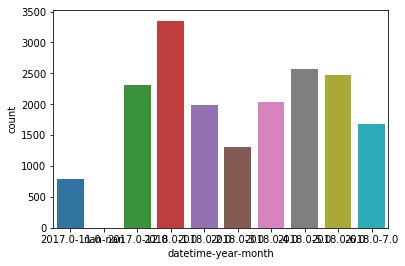

In [21]:
sns.countplot(data=saju, x='datetime-year-month')

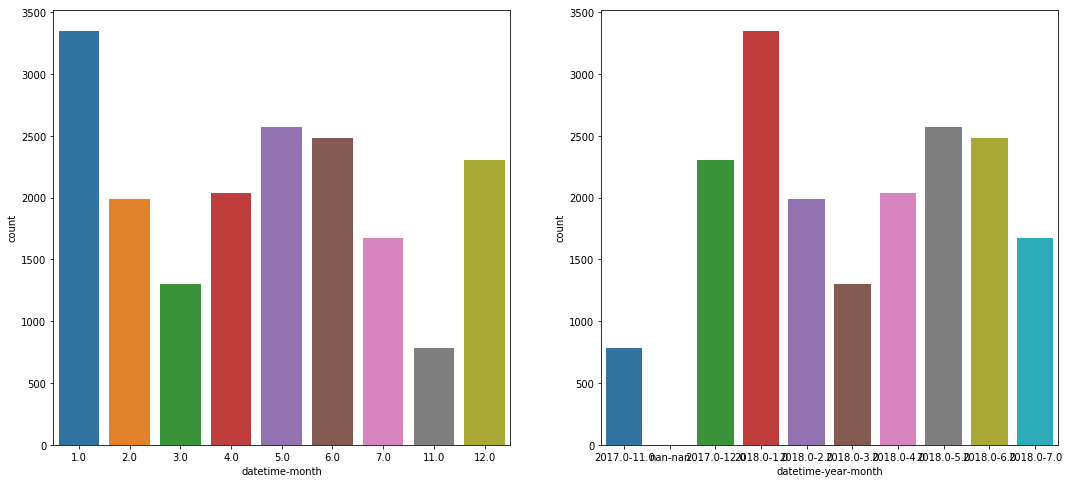

In [23]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 8)

sns.countplot(data=saju, x='datetime-month', ax=ax1)
sns.countplot(data=saju, x='datetime-year-month', ax=ax2)

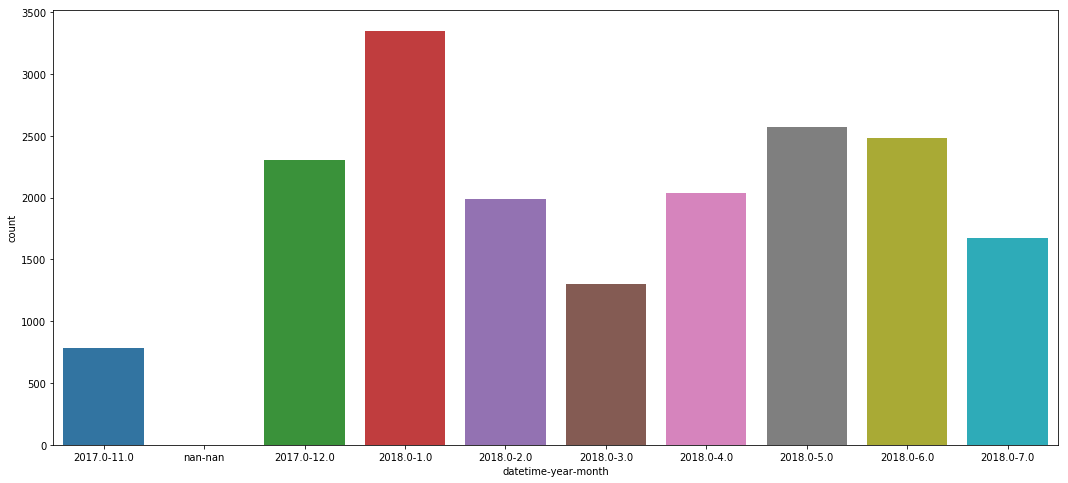

In [25]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 8)

sns.countplot(data=saju, x='datetime-year-month', ax=ax1)

In [14]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

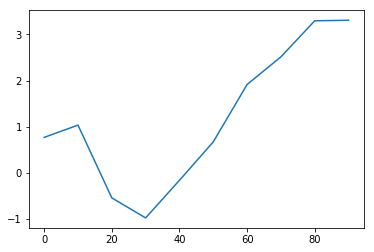

In [16]:
s.plot()

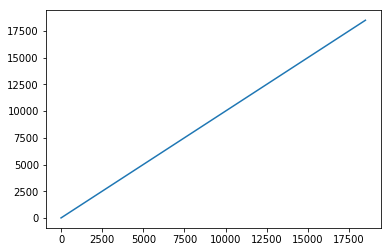

In [18]:
df = saju['log_id']
df.plot()